In [320]:
class DataAquisition: 
    '''
    A class with two functions that...
    '''
    import fastf1 as f1
    import pandas as pd
    import numpy as np
    from datetime import timedelta
    import matplotlib.pyplot as plt

    
    def __init__(self): 
        '''
        Init the class function
        '''
        print('Class is initialized')

    def get_practice_laps(self, gp, year): 
        FP1_session = f1.get_session(year = year, gp = gp, identifier = 'FP1')
        FP2_session = f1.get_session(year = year, gp = gp, identifier = 'FP2')
        FP3_session = f1.get_session(year = year, gp = gp, identifier = 'FP3')

        FP1_session.load()
        FP2_session.load()
        FP3_session.load()

        df_FP1_session = FP1_session.laps
        df_FP2_session = FP2_session.laps
        df_FP3_session = FP3_session.laps

        return df_FP1_session, df_FP2_session, df_FP3_session

    def get_fastest_laps(self, gp, year): 
        list_of_FP_sessions = self.get_practice_laps(gp, year)
        
        #Empty dataframe with columns for driver and their fastest lap
        valid_driver_fastest_lap = pd.DataFrame(columns=['DriverNumber','Session','FastestLap'])
        
        for session in range(len(list_of_FP_sessions)):
            #Collect all drivers that have completed a lap in FP 
            drivers = list_of_FP_sessions[session]['DriverNumber'].unique()
        
            for i in range(len(drivers)):
                #Collect all laps completed by driver
                driver_laps = list_of_FP_sessions[session][list_of_FP_sessions[session]['DriverNumber'] == drivers[i]]
                
                #Remove deleted laps and NaN lap times 
                valid_driver_laps = driver_laps[driver_laps['Deleted'].astype(bool) == False].dropna(subset=['LapTime'])
    
                #Temp list to store laps in total seconds 
                driver_lap_times_sec = []
    
                #Converting drivers laps to seconds
                for j in range(len(valid_driver_laps)):
                    driver_lap_times_sec.append(valid_driver_laps.iloc[j]['LapTime'].total_seconds())
    
                #Sort drivers lap times. Fastest lap is at [0]
                driver_lap_times_sec.sort()
            
                #Add drivers fastest lap to dataframe
                valid_driver_fastest_lap.loc[len(valid_driver_fastest_lap)] = [drivers[i],f'FP{session + 1}' , driver_lap_times_sec[0]]

        #Sort dataframe before returning 
        valid_driver_fastest_lap = valid_driver_fastest_lap.sort_values(by = 'FastestLap').reset_index(drop = True)    
        
        return valid_driver_fastest_lap

In [321]:
class1 = DataAquisition()

Class is initialized


In [322]:
df = class1.get_fastest_laps(gp = 'Monza', year = 2025)
df

,DriverNumber,Session,FastestLap
0,4,FP3,79.331
1,16,FP3,79.352
2,81,FP3,79.496
3,1,FP3,79.498
4,63,FP3,79.515
5,5,FP3,79.558
6,44,FP3,79.598
7,6,FP3,79.603
8,12,FP3,79.696
9,23,FP3,79.720


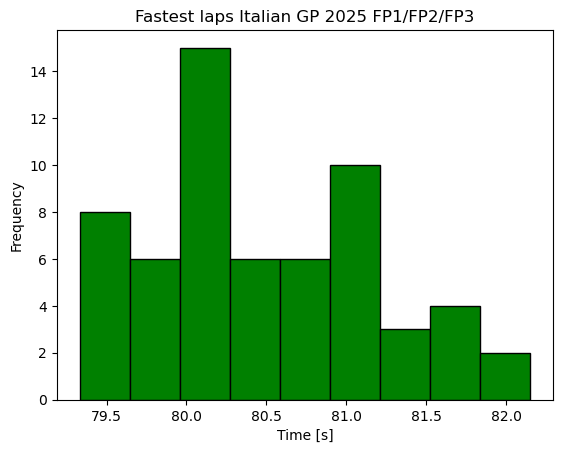

In [323]:
plt.hist(df['FastestLap'], bins = 9, color = 'green', edgecolor = 'black')
plt.xlabel("Time [s]")
plt.ylabel("Frequency")
plt.title("Fastest laps Italian GP 2025 FP1/FP2/FP3")
plt.show()